<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Linear_Regression_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Andrew NG Machine learning course Assigment 1 Python Solution

## Loading Data

In [2]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()
data = np.loadtxt("ex1data1.txt",delimiter=",")
data

## Visualization

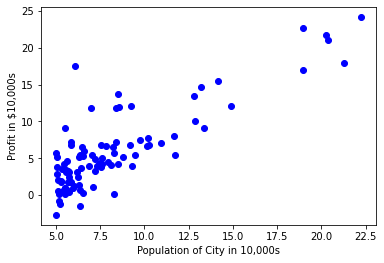

In [4]:
x = data[:,0]
y = data[:,1]
plt.scatter(x,y,color='blue')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

## Gradient Descent

Sample and Target Matrix reshaping and adding second feauture as 1

In [ ]:
x_matrix = x.reshape((-1,1))
y = y.reshape((-1,1))
ones = np.ones((len(x),1))
X = np.append(x_matrix,ones,axis=1)
X

Cost Function (Vectorized implementation)  $\ J=1/(2m) $$\sum_{i=1}^m(h_\theta(x^i)-y^i)^2$

In [6]:
def compute_cost(X,y,theta):
  m = len(y)
  return  (1/(2*m))*np.sum(np.square((X.dot(theta))-y))




Gradient Function (Vectorized Implementation) $\ h_\theta(x)=\theta_0+\theta_1x_1$

In [7]:
def gradient(X,y,theta,alpha,iteration):
  m=len(y)
  cost=[]
  for i in range(iteration):
    theta = theta - ((alpha/m) * (X.T.dot((np.subtract(X.dot(theta),y)))))
    cost.append(compute_cost(X,y,theta))
  return theta,cost


Initialize theta and iteration

In [8]:
theta = np.array([[0],[0]])
(new_theta,last_cost) = gradient(X,y,theta,0.01,1500)

Checking results

Text(0.5, 1.0, 'Cost versus Iteration')

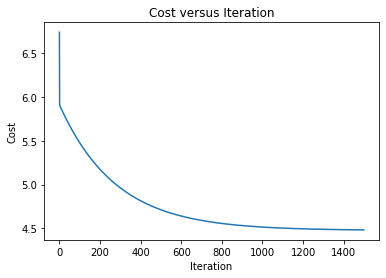

In [17]:
plt.plot(range(1500), last_cost)
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.title('Cost versus Iteration')

In [18]:
new_theta

array([[ 1.16636235],
       [-3.63029144]])

Calculation profit where the city population is 70.000, and result is around 45.000$

In [16]:
(np.array([7,1])).dot(new_theta)

array([4.53424501])

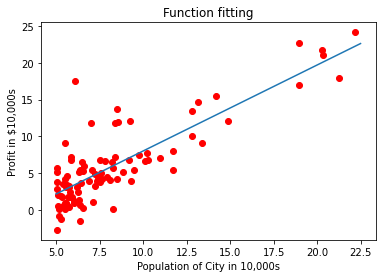

In [23]:
x_points = [5, 22.5]
y_points = [new_theta[0]*x + new_theta[1] for x in x_points]
plt.scatter(x, y, color='red')
plt.plot(x_points, y_points)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Function fitting')
plt.show()